This notebook shows an example of the pipeline

In [1]:
import importlib
gaia = importlib.import_module('gaia-tools', None)
import pandas as pd

**Load data set**

In [2]:
df = pd.read_csv("../../astroquery_test.csv", index_col="source_id")
print(df.shape)
print("Filtering entries that are further than 32 000 pc")
df = gaia.filter_distance(df, 32000)
print(df.shape)
print("Removing negative parallaxes...")
df=df[df.parallax > 0]
print(df.shape)

(100, 95)
Filtering entries that are further than 32 000 pc
(98, 96)
Removing negative parallaxes...
(85, 96)


In [3]:
pd.set_option("display.max.columns", None)
df.head()

,solution_id,designation,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,distance
2,1635721458409799680,Gaia DR2 4103049637327213440,682758182,2015.5,278.887615,0.117672,-15.350780,0.103104,0.043251,0.117026,0.369583,-1.918747,0.226716,-2.489130,0.158966,-0.307378,-0.069306,0.394963,-0.540246,-0.473565,-0.477438,0.140469,-0.035642,0.033881,-0.406090,97,0,97,0,4.932892,175.41916,0.365237,4.807110e+00,31,False,3.666943,1.385547,0.029204,-0.125317,11,8,0.231377,0,12,False,98,6680.108095,10.986732,608.0159,16.126408,10,1819.765784,27.980929,65.035934,17.201350,9,8155.307063,28.250495,288.67838,14.983319,1.493250,0,2.218030,1.074942,1.143088,-986.247661,4.475084,2,4500.0,3.0,0.0,NOT_AVAILABLE,17.472077,-3.512395,278.649202,7.822054,102001.0,3600.0000,3457.0000,3894.1833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,NaN,23.120857
3,1635721458409799680,Gaia DR2 5951114420631264640,1183730627,2015.5,260.139995,0.042137,-46.794507,0.038528,0.987297,0.051966,18.998867,2.684643,0.077350,2.938682,0.064244,0.312388,-0.079589,-0.496449,-0.238739,-0.411357,-0.074830,-0.734830,-0.278981,0.467930,0.111735,229,0,228,1,-0.542917,211.08633,0.000000,0.000000e+00,31,False,13.328932,1.541381,0.008035,0.162189,26,13,0.081417,0,27,False,236,11895.536852,5.869293,2026.7411,15.499906,23,5555.703690,23.199597,239.474150,15.989540,25,9299.009293,38.059019,244.33130,14.840828,1.248764,0,1.148712,0.489635,0.659078,-984.274896,3.400098,2,4500.0,3.0,0.0,NOT_AVAILABLE,342.314096,-5.568968,262.649370,-23.606504,100001.0,4937.8600,4828.6924,5162.3335,0.5495,0.4883,0.6579,0.2637,0.2364,0.3320,200111.0,1.003779,0.918382,1.049679,0.539667,0.477593,0.601741,https://gea.esac.esa.int/data-server/datalink/...,NaN,1.012866
4,1635721458409799680,Gaia DR2 5966712023814100736,312847491,2015.5,255.893150,0.069434,-41.563702,0.055033,0.794860,0.068601,11.586726,1.408253,0.127427,-3.243735,0.095118,-0.164452,-0.314439,-0.613641,0.170663,-0.072667,0.266577,-0.821567,0.017988,0.131175,-0.301309,230,0,229,1,1.600569,258.87936,0.000000,0.000000e+00,31,False,6.770454,1.422028,0.010940,0.056913,26,11,0.135369,0,28,False,237,6200.047196,3.857610,1607.2250,16.207378,24,2040.744021,10.191362,200.242520,17.076918,25,6160.754812,18.125068,339.90244,15.287835,1.322812,0,1.789083,0.869539,0.919543,-967.749688,5.796574,2,5500.0,3.5,-1.5,NOT_AVAILABLE,344.757653,-0.031937,258.901920,-18.666372,100001.

In [4]:
print (df.shape)

df.info()

(85, 96)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 2 to 97
Data columns (total 96 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   solution_id                       85 non-null     int64  
 1   designation                       85 non-null     object 
 2   random_index                      85 non-null     int64  
 3   ref_epoch                         85 non-null     float64
 4   ra                                85 non-null     float64
 5   ra_error                          85 non-null     float64
 6   dec                               85 non-null     float64
 7   dec_error                         85 non-null     float64
 8   parallax                          85 non-null     float64
 9   parallax_error                    85 non-null     float64
 10  parallax_over_error               85 non-null     float64
 11  pmra                              85 non-null     float64
 12  p

**Transform ICRS into cylindrical galactocentric coordinates**

In [4]:
galcen = gaia.get_transformed_data(df, include_cylindrical=True)
galcen.head()
# TODO: might be interesting to mantain the source_id

,x,y,z,v_x,v_y,v_z,r,phi,v_r,v_phi
0,13831.737322,6928.788655,-1445.242919,-822.263334,-385.301127,131.706601,15470.134762,0.464395,-906.274384,56.927052
1,-7217.748789,-306.255155,-83.288781,-916.528866,547.960037,102.054352,7224.243199,0.042405,-892.460512,586.344267
2,-6964.159647,-330.752976,13.775499,-925.341324,476.795295,-8.705995,6972.009547,0.047458,-901.661690,520.188923
3,-3052.875627,-1095.654150,-464.059051,-876.698931,357.141323,135.477902,3243.533198,0.344575,-695.399854,642.316108
4,-6167.431501,2135.170718,-154.256855,-548.027772,-419.102757,46.485986,6526.573781,-0.333286,-373.299798,-580.197226


**Merge $v_{\phi}$ into $(R, z)$-plane**

- Bins in z??

In [5]:
N_bins = 10 # number bins in R
BL_r   = 100000 # ??
BL_z   = 5000   # ??
bins   = gaia.get_collapsed_bins(galcen, N_bins, BL_r, BL_z)

Empty bin: 13!
Skipping bin: 23 and 24!
Empty bin: 26!
Empty bin: 32!
Skipping bin: 35 and 36!
Empty bin: 37!
Empty bin: 38!
Empty bin: 39!
Empty bin: 40!
Empty bin: 41!
Empty bin: 42!
Empty bin: 43!
Empty bin: 44!
Empty bin: 45!
Empty bin: 46!
Skipping bin: 47 and 48!
Empty bin: 49!
Empty bin: 50!
Empty bin: 51!
Empty bin: 52!
Empty bin: 53!
Empty bin: 54!
Empty bin: 55!
Empty bin: 56!
Empty bin: 57!
Empty bin: 58!
Skipping bin: 59 and 60!
Empty bin: 61!
Empty bin: 62!
Empty bin: 63!
Empty bin: 64!
Empty bin: 65!
Empty bin: 66!
Empty bin: 67!
Empty bin: 68!
Empty bin: 69!
Empty bin: 70!
Skipping bin: 71 and 72!
Empty bin: 73!
Empty bin: 74!
Empty bin: 75!
Empty bin: 76!
Empty bin: 77!
Empty bin: 78!
Empty bin: 79!
Empty bin: 80!
Empty bin: 81!
Empty bin: 82!
Skipping bin: 83 and 84!
Empty bin: 85!
Empty bin: 86!
Empty bin: 87!
Empty bin: 88!
Empty bin: 89!
Empty bin: 90!
Empty bin: 91!
Empty bin: 92!
Empty bin: 93!
Empty bin: 94!
Skipping bin: 95 and 96!
Empty bin: 97!
Empty bin: 98!


*Plot results*

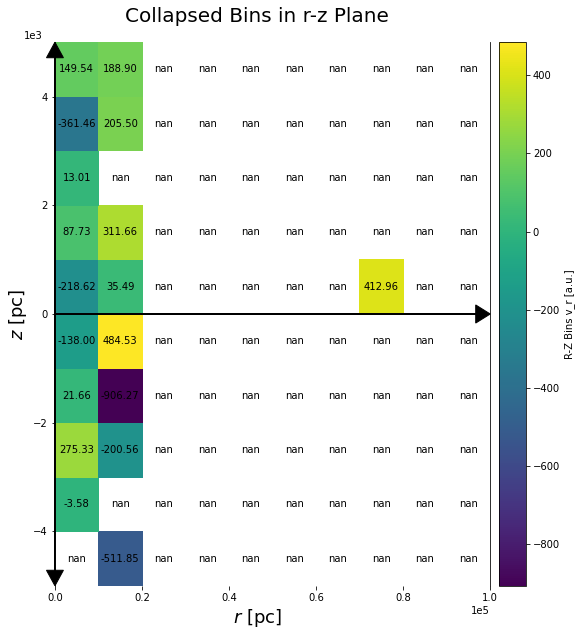

In [6]:
gaia.plot_collapsed_bins(bins, 'v_r')